In [47]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [67]:
model = "meta-llama3-8b-instruct"
stats_df = pd.read_csv('data/%s_users_stats.csv' % model)
stats_history_df = pd.read_csv('data/%s_users_stats_history.csv' % model)
gpu_util_df = pd.read_csv('data/%s_gpu_util.csv' % model)

In [ ]:
stats_df

In [60]:
stats_history_df['Timestamp'] = stats_history_df['Timestamp'].astype(int)
gpu_util_df['Timestamp'] = gpu_util_df['Timestamp'].astype(int)

In [66]:
stats_history_df

,Timestamp,User Count,Type,Name,Requests/s,Failures/s,50%,66%,75%,80%,...,99.9%,99.99%,100%,Total Request Count,Total Failure Count,Total Median Response Time,Total Average Response Time,Total Min Response Time,Total Max Response Time,Total Average Content Size
0,1717038617,0,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0.0,0,0,0


In [65]:
gpu_util_df

,Timestamp,GPU Utilization (%),GPU Memory Utilization (%)
0,1717038617,0,0
1,1717038618,84,74
2,1717038619,55,46
3,1717038620,70,58
4,1717038621,72,59
...,...,...,...
301,1717038935,0,0
302,1717038936,0,0
303,1717038937,0,0
304,1717038938,0,0


In [63]:
merged_data = pd.merge_asof(stats_history_df.sort_values('Timestamp'),
                            gpu_util_df.sort_values('Timestamp'),
                            on='Timestamp',
                            direction='nearest')
merged_data['Timestamp'] = merged_data['Timestamp'] - merged_data['Timestamp'][0]

In [64]:
merged_data

,Timestamp,User Count,Type,Name,Requests/s,Failures/s,50%,66%,75%,80%,...,100%,Total Request Count,Total Failure Count,Total Median Response Time,Total Average Response Time,Total Min Response Time,Total Max Response Time,Total Average Content Size,GPU Utilization (%),GPU Memory Utilization (%)
0,0,0,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0.0,0,0,0,0,0


In [35]:
merged_data.columns

Index(['Timestamp', 'User Count', 'Type', 'Name', 'Requests/s', 'Failures/s',
       '50%', '66%', '75%', '80%', '90%', '95%', '98%', '99%', '99.9%',
       '99.99%', '100%', 'Total Request Count', 'Total Failure Count',
       'Total Median Response Time', 'Total Average Response Time',
       'Total Min Response Time', 'Total Max Response Time',
       'Total Average Content Size', 'GPU Utilization (%)'],
      dtype='object')

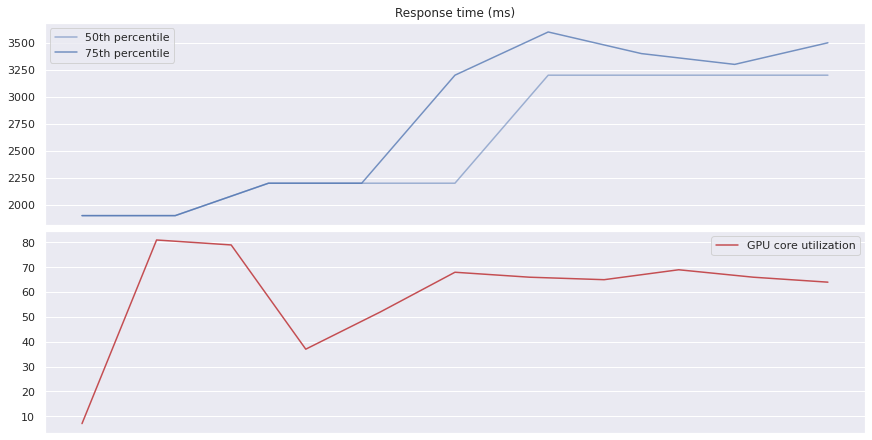

In [42]:
fig, axs = plt.subplot_mosaic([
    ['response_time'],
    ['utilization'],
], layout='constrained', figsize=(18,8))

axs['response_time'].set_title('Response time (ms)')
axs['response_time'].plot(merged_data['Timestamp'], merged_data['50%'], color='b', alpha=.5, label='50th percentile')
axs['response_time'].plot(merged_data['Timestamp'], merged_data['75%'], color='b', alpha=.75, label='75th percentile')
axs['response_time'].plot(merged_data['Timestamp'], merged_data['90%'], color='b', alpha=.9, label='90th percentile')
axs['response_time'].plot(merged_data['Timestamp'], merged_data['99%'], color='b', alpha=.99, label='99th percentile')
axs['response_time'].plot(merged_data['Timestamp'], merged_data['Total Average Response Time'], color='k', alpha=1, label='Total Average Response Time')
axs['response_time'].legend()
axs['response_time'].set_xticks([])
axs['utilization'].plot(merged_data['Timestamp'], merged_data['GPU Utilization (%)'], c='r', label='GPU core utilization')
ax_memory = axs['utilization'].twinx()
ax_memory.plot(merged_data['Timestamp'], merged_data['GPU Memory Utilization (%)'], c='r', label='GPU memory utilization')
axs['utilization'].legend()
axs['utilization'].legend()
axs['utilization'].set_ylabel('Seconds since sim start');
axs['utilization'].set_xlabel('Seconds since sim start');